<h4><center> Introduction to building a quant pricing library practice
 </center></h4>

<h1><center> Pricing Asian Options </center></h1>

<h4><center>
<h3><center> Varga László </center></h3> <br /> 
Department of Probability Theory and Statistics, ELTE, TTK <br /> 
</center></h4>
     
<h4><center> <a href="mailto:vargala4@gmail.com">vargala4@gmail.com</a>  </center></h4>    




<h3><center> Introduction - Asian options </center></h3>

- Derivative contracts written on an average price
- Average price: arithmetic or geometric
- Exercise is usually European style
- First appearance: 1987 Tokyo
- Example: call option on a WTI (West Texas international, oil underlying) contract with 1000 bbl (barrel) notional, 2025 February 5 delivery, option excersise date 2025 January 31, strike 85 \$/bbl. The option is based on the daily average prices in 2025 January.




- Advantages:
    - smooths volatile market movements
    - excellent hedging tool when the market participants are exposed to average prices - popular in commodity markets


- Pricing methods:
    - exact calculation: not always possible or extremely computing intensive
    - Monte Carlo simulation
    - numerical solution of the pricing PDE
    - **moment matching** - most popular
    - upper/lower price bounds
    - transformations (Laplace)


<h3><center> Mathematical notations </center></h3>

- $(S_t)_{t\in [0,T]}$: asset price process
- $S_0$: initial price
- $T$: exercise date
- $K$: strike
- $\{ t_1,\ldots,t_n \}$: fix observation times, $0\leq t_1 \leq \ldots \leq t_n \leq T$ on which we take the average of the asset price
- $A_T$: average of the underlying asset prices in time interval $[0,T]$
- $x_+=max(x,0)$: positive value of $x$

<h3><center> Types of Asian options </center></h3>

- Call or Put
- Strike style
    - **Fixed strike**: Payoff of call option$=(A_T-K)_+$
    - Floating strike: Payoff of call option$=(S_T - A_T)_+$
    


- Averaging type and Monitoring frequency

**Averaging type $\quad$  Continuously monitored $\qquad \qquad \ $ Discretely monitored**                                                    
Geometric    $\qquad$    $\left(exp\left\{ \frac{1}{T}\int\limits_0^T \log S_t \,dt \right\} -K \right)_+$    $\quad$      $\left(  \left( \prod\limits_{i=1}^n S_{t_i} \right)^{1/n} -K \right)_+ $

Arithmetic  $\qquad \qquad$  $\left( \frac{1}{T}\int\limits_0^T S_t\, dt-K \right)_+$ $\qquad \qquad \quad$ $\color{blue}{\left( \frac{1}{n} \sum\limits_{i=1}^n S_{t_i} -K \right)_+} $



<h3><center> Pricing of Asian options </center></h3>

- Price (PV) of a Call Asian option at time $t=0: \quad e^{-rT}E\left[ (A_T-K)_+ \right]$
- There is no closed formula for the price, as $A_T$ is the arithmetical average of lognormal random variables, which is (usually) not lognormally distributed


- Why is it so hard to calculate?

- Because we have to calculate a multiple integral with $n$ variables which is the following in case $S_t$ is the GBM process with parameters $\mu$ and $\nu$:

$E\left[ (A_T-K)_+ \right] =  $

$\ =\scriptsize \int\limits_{-\infty}^{\infty}\cdots \int\limits_{-\infty}^{\infty}
\left[ \frac{S_0}{n}
\left( e^{\left(\mu- \frac{\nu^2}{2} \right)t_1+\nu W_{t_1}}+\ldots+e^{\left(\mu- \frac{\nu^2}{2} \right)t_n+\nu W_{t_n}} \right) 
-K \right]_+ f_{(W_{t_1},\ldots,W_{t_n})}(x_1,\ldots,x_n)dx_1\ldots dx_n$

<h3><center> Pricing by moment matching </center></h3>

- First proposed by Edmond Levy for Asian options
- Let us assume that $S_t$ is the GBM process, i.e. $\frac{S_t}{S_0}$ is lognormally distributed
- We approximate $A_T$ by a properly scaled and parametrized lognormal random variable $U$
- The lognormal distribution is determined by its first two moments, therefore we match the first two moments of $A_T$ and $U$


First and second moments of $A_T$ are
- $ E \left(A_T \right) =  \frac{S_0}{n}\sum\limits_{i=1}^{n}\exp\left\{rt_i\right\}$
- $ E \left( A_T^2 \right) =  \frac{S^2_0}{n^2}\sum\limits_{i,j=1}^{n}\exp\left\{r(t_i+t_j) + \sigma^2\min(t_i, t_j)\right\}$

$\hspace{-5mm}$
If $\frac{U}{S_0}$ is lognormal with parameters $m$ and $\sigma$, then the first two moments of $U$ are 

$\quad EU = S_0\exp\left\{m+\frac{\sigma^2}{2} \right\} \quad $ and 
$\quad E U^2 = S_0^2 \exp\left\{2m+2\sigma^2 \right\}$

Matching the first two moments and solving the system of equations:
- $m = 2\, \text{log} \left( \frac{E\left(A_T\right)}{S_0} \right)- \frac{1}{2} \, \text{log} \left( \frac{E\left(A_T^2\right)}{S_0^2} \right)$ 
- $\sigma^2 = \text{log} \left( \frac{E\left(A_T^2\right)}{S_0^2} \right) - 2 \text{log} \left( \frac{E\left(A_T\right)}{S_0} \right)$

Finally we can approximate the PV of the Call Asian option at time $t=0$:

$e^{-rT}E\left[ (A_T-K)_+ \right] \approx$
$e^{-rT}E\left[ (U-K)_+\right] = e^{-rT}E\left[ (S_0e^{m+\sigma N(0,1^2)}-K)_+\right]$


The calculation leads to a very similar integral which we calculated when deriving the Black-Scholes formula:

$E\left[ (U-K)_+\right] = \int\limits_{-\infty}^{\infty} (S_0e^{m+\sigma x}-K)_+ \cdot \frac{1}{\sqrt{2\pi}}e^{-x^2/2}\, dx$

$= S_0 \int\limits_{\frac{1}{\sigma}\left[ log\left( \frac{K}{S_0}\right)-m\right]}^{\infty} e^{m+\sigma x} \frac{1}{\sqrt{2\pi}}e^{-x^2/2}\, dx \quad + \quad 
K  \int\limits_{\frac{1}{\sigma}\left[ log\left( \frac{K}{S_0}\right)-m\right]}^{\infty}  \frac{1}{\sqrt{2\pi}}e^{-x^2/2}\, dx$


    

To calculate the first integral, the key idea is to observe that the integrand is the density function of $N(\sigma, 1^2)$:

$e^{m+\sigma x} \frac{1}{\sqrt{2\pi}}e^{-x^2/2} = e^{m+\sigma^2/2}\cdot \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}(x-\sigma)^2}$


$E\left[ (U-K)_+\right] = S_0 e^{m+\sigma x}P\left(N(\sigma,1^2)>\frac{1}{\sigma}\left[ log\left( \frac{K}{S_0}\right)-m\right]\right) + $

$\qquad \qquad \qquad + P\left(N(0,1^2)> \frac{1}{\sigma}\left[ log\left( \frac{K}{S_0}\right)-m\right] \right)$

Finishing off the calculations, we get the moment matching approximation price of a Call Asian option:

$\hspace{30mm} e^{-rT}\left(S_0 e^{m+\frac{\sigma^2}{2}} \Phi\left(d_1\right)-K \Phi\left(d_2\right)\right)$, where

- $d_1=\frac{\log \left(\frac{S_0}{K}\right)+m+\sigma^2}{\sigma}$
- $d_2=d_1-\sigma$ 
    

When do we consider the price derived by the moment matching approximation appropriate?

If the moment matching price $P_{MM}$ lies within the $95\%$ confidence interval of the Monte Carlo simulation price $P_{MC}$:

$P_{MM} \in \left[ P_{MC}-1.96\cdot sd(P_{MC}), P_{MC}+1.96\cdot sd(P_{MC}) \right]$

or equivalently, for the standardized difference 

$\frac{P_{MM}-P_{MC}}{sd(P_{MC})} \in \left[ -1.96, +1.96 \right]$

<h3><center> Exercises </center></h3>

- Check the Asian pricer in the codebase and calculate the price of an Asian option and the Greeks.

- Compare the moment matching approach with Monte Carlo pricing for moneyness values 0.8, 0.9, 1, 1.1 and 1.2, where **moneyness** is $\frac{K}{S_0}$.



In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

current = Path().resolve()
sys.path.append(str(current))
sys.path.append(str(current.parents[1]))

from src.enums import *
from src.utils import *
from src.market_data import *
from src.pricer import *
# Make charts interactive
%matplotlib notebook

# Initialize market data
MarketData.initialize()

In [2]:
underlying = Stock.TEST_COMPANY
spot = FlatVolModel(underlying).get_spot()
print(spot)

100.0


In [3]:
moneyness = 1
expiry = 1
strike = spot * moneyness
vol = FlatVolModel(underlying).get_vol(strike, expiry)
print(vol)

0.3


In [4]:
nr_monitoring_points = 100 

volgrid = MarketData.get_vol_grid()[underlying]
contract = AsianContract(underlying, PutCallFwd.CALL, LongShort.LONG, strike, expiry, nr_monitoring_points)
model = FlatVolModel(underlying)
params = Params()
pricer_MM = AsianMomentmatchingPricer(contract, model, params)
print(pricer_MM.calc_fair_value())

params_MC = MCParams(seed = 1)
pricer_MC = GenericMCPricer(contract, model, params_MC)
print(pricer_MC.calc_fair_value())

8.055655385255257
(8.096143671043494, [7.854293597090771, 8.337993744996218])


In [ ]:
# we can calculate the Greeks based on moment matching

method = GreekMethod.BUMP
pricer_MM.calc_delta(method)
pricer_MM.calc_vega(method)

In [5]:
# We can modify the Monte Carlo parameters if needed
params_MC_mod = MCParams(seed = 9, standardize = False, antithetic = False, num_of_path = 1000, tenor_frequency = 1)
GenericMCPricer(contract, model, params_MC_mod).calc_fair_value()

(8.0106298422636, [7.268185031764868, 8.753074652762333])

In [6]:
moneyness_list = [0.8, 0.9, 1, 1.1, 1.2]
strike_list = [spot * moneyness for moneyness in moneyness_list]
contract_list = [AsianContract(underlying, PutCallFwd.CALL, LongShort.LONG, strike, expiry, nr_monitoring_points) 
                 for strike in strike_list]

price_MM_list = [AsianMomentmatchingPricer(contract, model, params).calc_fair_value() for contract in contract_list]
price_MC_list = [GenericMCPricer(contract, model, params_MC).calc_fair_value() for contract in contract_list]


<IPython.core.display.Javascript object>


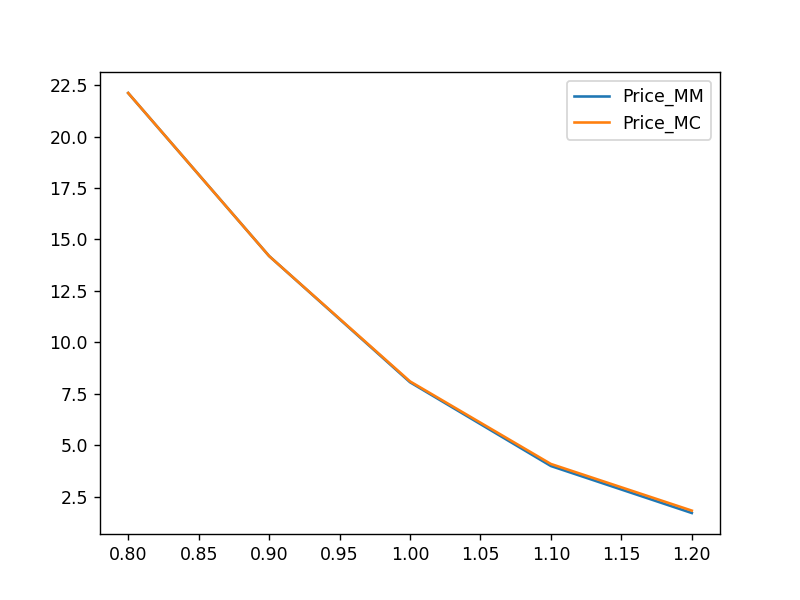

In [7]:
plt.figure(0)
plt.plot(moneyness_list, price_MM_list, label="Price_MM")
plt.plot(moneyness_list, [val[0] for val in price_MC_list], label="Price_MC")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


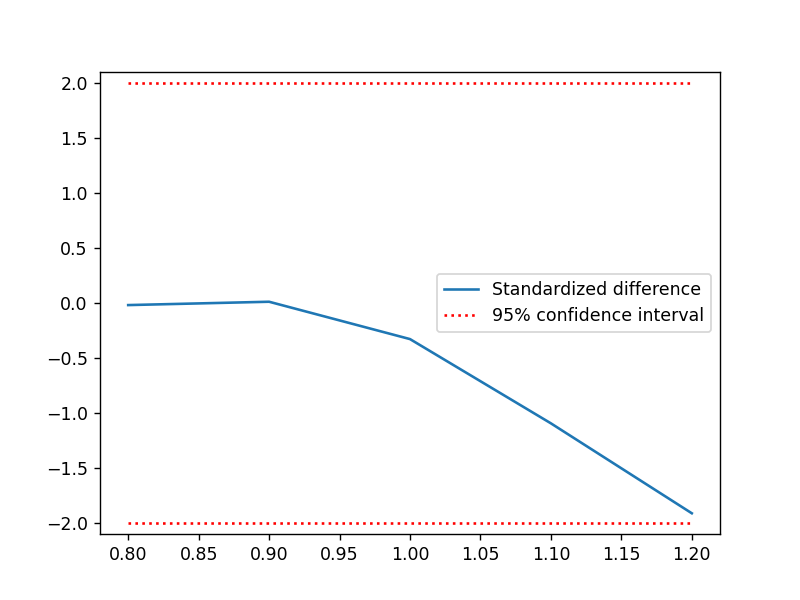

In [9]:
sd_MC_list = [(val[0]-val[1][0])/1.96 for val in price_MC_list]

plt.figure(1)
plt.plot(moneyness_list, [(pr_MM - price_MC_list[i][0])/sd_MC_list[i] for i, pr_MM in enumerate(price_MM_list)], 
         label="Standardized difference")
plt.plot(moneyness_list, [-2 for _ in moneyness_list], ':', color="r", label="95% confidence interval")
plt.plot(moneyness_list, [2 for _ in moneyness_list], ':', color="r")
plt.ylim(-2.1, 2.1)
plt.legend()
plt.show()

<h3><center> Assignment </center></h3>

- Implement and test the other confidence interval construction methodology. (comment: maybe more suitable for Ernő's topic)
- Show by simulation and a graph that for increasing volatility, the error of the moment matching approximation increases. (right now the codebase is not able to price with different vols, the vol is determined from the market model)
- Show by simulation and a graph that for longer averaging periods, the error of the moment matching approximation increases. What is the mathematical theorem that substitutes this result? (answer: central limit theorem)

<h3><center> Conclusions </center></h3>

Experience with the moment matching technique
- Fast calculations
- The approximation is very good for short averaging periods
- The approximation gets worse if volatility is large and the averaging period is long
- Risks are stable even under severely stressed conditions

<h3><center> References </center></h3>

- Pak Keung Chan: Pricing Asian Options by the Method of Moments Matching. Master Thesis, University of Waterloo, Ontario, Canada, 2015
- Edmond Levy: Pricing european average rate currency options. Vol. 11, No 5. (1992), pp. 474–491, *Journal of International Money and Finance*
- Stuart M. Turnbull and Lee MacDonald Wakeman: A Quick Algorithm for Pricing European Average Options. The Journal of Financial and Quantitative Analysis. Vol. 26, No. 3 (Sep., 1991), pp. 377-389, *Cambridge University Press*
